In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import distance
from scipy.spatial.distance import hamming
from scipy.cluster.hierarchy import linkage, fcluster

In [6]:
profiles = pd.read_csv(
    '../../Data/MLST_assighnment.tsv', sep='\t').set_index('ST').dropna()

In [4]:
allCCs = profiles['clonal_complex'].drop_duplicates().apply(lambda x: int(x.split()[0].split('-')[1]))

In [5]:
df = profiles.loc[profiles.index.isin(allCCs)].drop('clonal_complex', axis=1)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


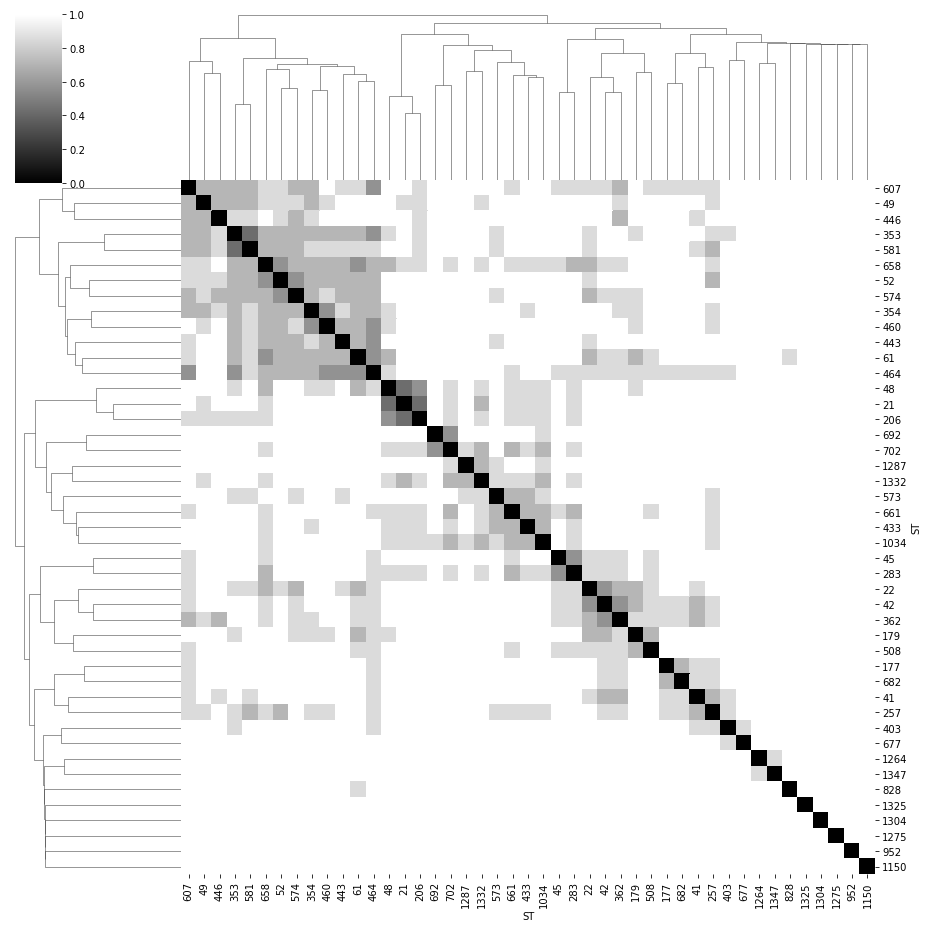

In [40]:
correlations = df.T.corr(method=hamming)
np.fill_diagonal(correlations.values,0)
correlations_array = np.asarray(correlations)

linkageMatrix = linkage(
    distance.pdist(correlations_array), method='average')

clusters = fcluster(linkageMatrix, t=3, criterion='maxclust', depth=2, R=None, monocrit=None)

sns.clustermap(correlations, row_linkage=linkageMatrix, method="average",
            figsize=(13, 13), cmap='binary_r')

df['cluster'] = clusters

In [13]:
cc = 464

In [14]:
df = profiles.loc[profiles['clonal_complex'] == f'ST-{cc} complex'].drop('clonal_complex', axis=1)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


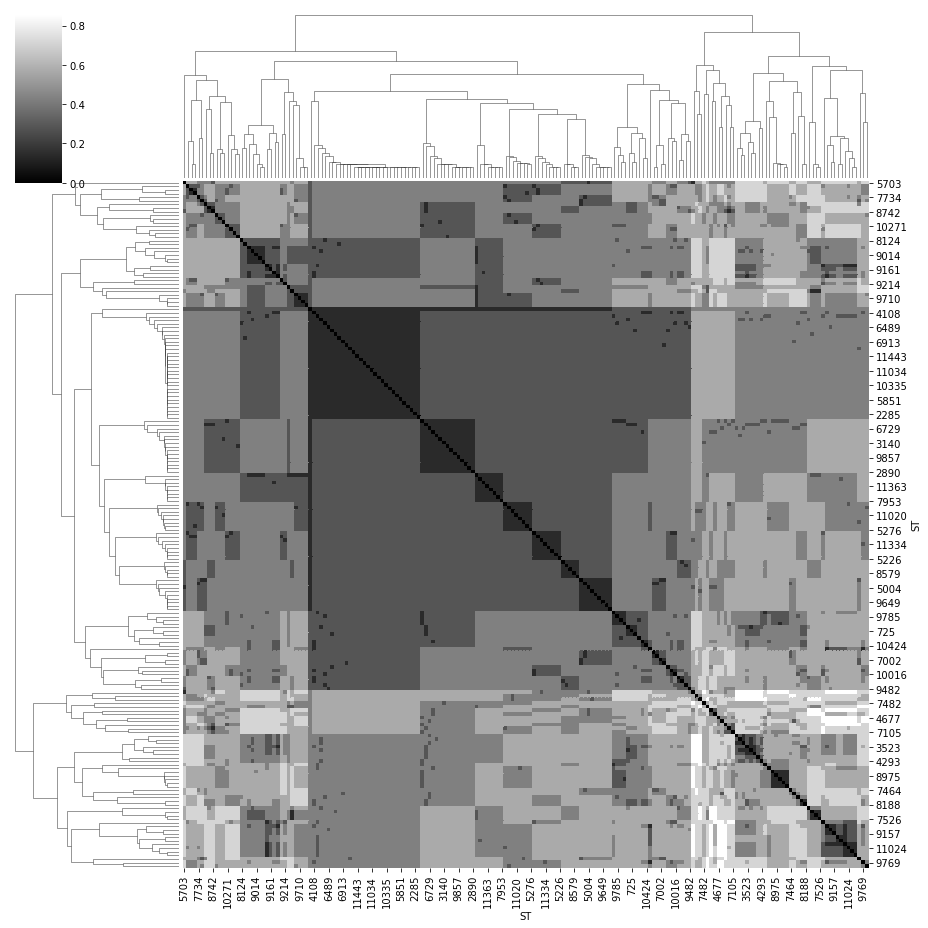

In [15]:
correlations = df.T.corr(method=hamming)
np.fill_diagonal(correlations.values,0)
correlations_array = np.asarray(correlations)

linkageMatrix = linkage(
    distance.pdist(correlations_array), method='average')

clusters = fcluster(linkageMatrix, t=3, criterion='maxclust', depth=2, R=None, monocrit=None)

sns.clustermap(correlations, row_linkage=linkageMatrix, method="average",
            figsize=(13, 13), cmap='binary_r')

df['cluster'] = clusters

In [7]:
df.to_excel(f'CC{cc}_clusters_ST.xlsx')

In [6]:
df

,aspA,glnA,gltA,glyA,pgm,tkt,uncA,cluster
ST,,,,,,,,
5,7,2,5,2,10,3,6,1
12,7,1,5,2,11,3,6,1
26,14,18,5,2,11,3,6,1
37,7,17,2,2,18,3,6,1
82,7,1,2,2,4,3,6,1
...,...,...,...,...,...,...,...,...
11571,7,2,2,2,2,3,6,1
11591,7,227,5,68,10,3,1,1
11714,2,17,512,2,22,3,6,2
